In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gc

In [47]:
accidents_info_all = pd.read_excel(r'US_Accidents_Dec21_1 - probab.xlsx')

In [48]:
accidents_info_all

,Probability,Start_Time,End_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal
0,0.68,2017-07-01 14:25:00,2017-07-01 20:25:00,0.691,66.9,NaN,54.0,29.93,10.0,16.1,NaN,False,False,False,False,False
1,0.26,2017-07-01 14:32:00,2017-07-01 20:32:00,2.371,68.0,NaN,59.0,30.10,10.0,6.9,NaN,False,False,False,False,False
2,0.59,2017-07-01 14:31:00,2017-07-01 20:31:00,0.789,70.5,NaN,70.0,29.88,10.0,8.1,NaN,False,False,False,False,False
3,0.52,2017-07-01 14:42:00,2017-07-01 20:42:00,4.005,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False
4,0.58,2017-07-01 14:42:00,2017-07-01 20:42:00,4.136,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,0.40,2021-07-18 12:58:00,2021-07-18 14:39:00,3.003,90.0,90.0,57.0,29.93,10.0,0.0,0.00,False,False,False,False,False
4482,0.43,2021-09-02 08:12:00,2021-09-02 09:25:00,0.259,68.0,68.0,100.0,28.91,10.0,0.0,0.00,False,False,False,False,False
4483,0.36,2021-08-13 14:00:00,2021-08-13 17:01:00,0.285,96.0,96.0,40.0,29.39,10.0,0.0,0.00,False,False,False,False,False
4484,0.34,2021-08-01 23:57:00,2021-08-02 01:16:00,0.219,80.0,80.0,87.0,30.09,10.0,3.0,0.08,False,False,False,False,False


In [49]:
datetime_variables = ["Start_Time"]

In [50]:
datetime_variables_processed = pd.DataFrame() #extracting date,time , month and year from start_time
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all[datetime_variable])
    datetime_variables_processed["Accident_year"] = date.dt.year
    datetime_variables_processed["Accident_month"] = date.dt.month
    datetime_variables_processed["Accident_hour"] = date.dt.hour
    datetime_variables_processed["Accident_start"] = date

In [51]:
for datetime_variable in datetime_variables:
    date = pd.to_datetime(accidents_info_all["End_Time"])
    datetime_variables_processed["Accident_end"] = date

In [52]:
datetime_variables_processed = datetime_variables_processed.drop(["Accident_start","Accident_end"], axis=1)
datetime_variables_processed.columns

Index(['Accident_year', 'Accident_month', 'Accident_hour'], dtype='object')

In [53]:
datetime_variables_processed["Accident_hour"].unique()

array([14, 15, 17, 19, 21, 20, 22, 23,  0,  1,  3,  4,  5, 13, 16,  6,  7,
        8,  9, 10, 11, 12, 18,  2], dtype=int64)

In [54]:
datetime_variables_processed["Accident_month"].unique()

array([ 7,  3,  4,  9, 10, 12, 11,  6,  5,  8], dtype=int64)

In [55]:
accidents_info_merged = pd.merge(left=accidents_info_all, right=datetime_variables_processed, left_on=accidents_info_all.index,
         right_on=datetime_variables_processed.index) #merging the columns of time and date extracted from start_time with the data

In [56]:
accidents_info_merged

,key_0,Probability,Start_Time,End_Time,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour
0,0,0.68,2017-07-01 14:25:00,2017-07-01 20:25:00,0.691,66.9,NaN,54.0,29.93,10.0,16.1,NaN,False,False,False,False,False,2017,7,14
1,1,0.26,2017-07-01 14:32:00,2017-07-01 20:32:00,2.371,68.0,NaN,59.0,30.10,10.0,6.9,NaN,False,False,False,False,False,2017,7,14
2,2,0.59,2017-07-01 14:31:00,2017-07-01 20:31:00,0.789,70.5,NaN,70.0,29.88,10.0,8.1,NaN,False,False,False,False,False,2017,7,14
3,3,0.52,2017-07-01 14:42:00,2017-07-01 20:42:00,4.005,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False,2017,7,14
4,4,0.58,2017-07-01 14:42:00,2017-07-01 20:42:00,4.136,86.0,NaN,27.0,29.94,10.0,4.6,NaN,False,False,False,False,False,2017,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,4481,0.40,2021-07-18 12:58:00,2021-07-18 14:39:00,3.003,90.0,90.0,57.0,29.93,10.0,0.0,0.00,False,False,False,False,False,2021,7,12
4482,4482,0.43,2021-09-02 08:12:00,2021-09-02 09:25:00,0.259,68.0,68.0,100.0,28.91,10.0,0.0,0.00,False,False,False,False,False,2021,9,8
4483,4483,0.36,2021-08-13 14:00:00,2021-08-13 17:01:00,0.285,96.0,96.0,40.0,29.39,10.0,0.0,0.00,False,False,False,False,False,2021,8,14
4484,4484,0.34,2021-08-01 23:57:00,2021-08-02 01:16:00,0.219,80.0,80.0,87.0,30.09,10.0,3.0,0.08,False,False,False,False,False,2021,8,23


In [57]:
accidents_info_merged.dtypes

key_0                         int64
Probability                 float64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Bump                           bool
Crossing                       bool
Roundabout                     bool
Stop                           bool
Traffic_Signal                 bool
Accident_year                 int64
Accident_month                int64
Accident_hour                 int64
dtype: object

In [58]:
accidents_info_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 4485
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   key_0              4486 non-null   int64         
 1   Probability        4486 non-null   float64       
 2   Start_Time         4486 non-null   datetime64[ns]
 3   End_Time           4486 non-null   datetime64[ns]
 4   Distance(mi)       4486 non-null   float64       
 5   Temperature(F)     4389 non-null   float64       
 6   Wind_Chill(F)      426 non-null    float64       
 7   Humidity(%)        4389 non-null   float64       
 8   Pressure(in)       4404 non-null   float64       
 9   Visibility(mi)     4367 non-null   float64       
 10  Wind_Speed(mph)    3642 non-null   float64       
 11  Precipitation(in)  710 non-null    float64       
 12  Bump               4486 non-null   bool          
 13  Crossing           4486 non-null   bool          
 14  Roundabo

In [59]:
accidents_info_merged.shape

(4486, 20)

In [60]:
accidents_info = accidents_info_merged

In [61]:
accidents_info.shape

(4486, 20)

In [62]:
accidents_info.dtypes

key_0                         int64
Probability                 float64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Bump                           bool
Crossing                       bool
Roundabout                     bool
Stop                           bool
Traffic_Signal                 bool
Accident_year                 int64
Accident_month                int64
Accident_hour                 int64
dtype: object

In [63]:
accidents_info.isnull().sum()

key_0                   0
Probability             0
Start_Time              0
End_Time                0
Distance(mi)            0
Temperature(F)         97
Wind_Chill(F)        4060
Humidity(%)            97
Pressure(in)           82
Visibility(mi)        119
Wind_Speed(mph)       844
Precipitation(in)    3776
Bump                    0
Crossing                0
Roundabout              0
Stop                    0
Traffic_Signal          0
Accident_year           0
Accident_month          0
Accident_hour           0
dtype: int64

In [64]:
Temperature_mean=accidents_info['Temperature(F)'].mean()
accidents_info['Temperature(F)'].fillna(value=Temperature_mean, inplace=True)

Wind_Chill_mean=accidents_info['Wind_Chill(F)'].mean()
accidents_info['Wind_Chill(F)'].fillna(value=Wind_Chill_mean, inplace=True)

Humidity_mean=accidents_info['Humidity(%)'].mean()
accidents_info['Humidity(%)'].fillna(value=Humidity_mean, inplace=True)


Pressure_mean=accidents_info['Pressure(in)'].mean()
accidents_info['Pressure(in)'].fillna(value=Pressure_mean, inplace=True)

Visibility_mean=accidents_info['Visibility(mi)'].mean()
accidents_info['Visibility(mi)'].fillna(value=Visibility_mean, inplace=True)

Wind_Speed_mean=accidents_info['Wind_Speed(mph)'].mean()
accidents_info['Wind_Speed(mph)'].fillna(value=Wind_Speed_mean, inplace=True)

Precipitation_mean=accidents_info['Precipitation(in)'].mean()
accidents_info['Precipitation(in)'].fillna(value=Precipitation_mean, inplace=True)



In [65]:
accidents_info.isnull().sum()

key_0                0
Probability          0
Start_Time           0
End_Time             0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Bump                 0
Crossing             0
Roundabout           0
Stop                 0
Traffic_Signal       0
Accident_year        0
Accident_month       0
Accident_hour        0
dtype: int64

In [66]:
accidents_info = accidents_info.drop(
    ['key_0', 'Start_Time', 'End_Time'], axis=1)

In [67]:
accidents_info.shape

(4486, 17)

In [68]:
accidents_info.isnull().sum()

Probability          0
Distance(mi)         0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Bump                 0
Crossing             0
Roundabout           0
Stop                 0
Traffic_Signal       0
Accident_year        0
Accident_month       0
Accident_hour        0
dtype: int64

In [69]:
Probability = accidents_info['Probability']
Probability     

0       0.68
1       0.26
2       0.59
3       0.52
4       0.58
        ... 
4481    0.40
4482    0.43
4483    0.36
4484    0.34
4485    0.32
Name: Probability, Length: 4486, dtype: float64

In [70]:
accidents_info.to_csv("NEW BUILD transformed-2-0-csv.csv")

PermissionError: [Errno 13] Permission denied: 'NEW BUILD transformed-2-0-csv.csv'

In [ ]:
def plot_hist(df, bins = None, y_label = None, x_label = None):
    plt.hist(Probability, bins=4)
    if(y_label != None):
        plt.ylabel(y_label)
    if(x_label != None):
        plt.xlabel(x_label)
    plt.show()

In [ ]:
plot_hist(Probability, 4 , "Accidents count", "Severity")

In [ ]:
corr =  accidents_info.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [71]:
accidents_attributes = accidents_info.drop("Probability", axis=1)


In [72]:
accidents_attributes.dtypes

Distance(mi)         float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Bump                    bool
Crossing                bool
Roundabout              bool
Stop                    bool
Traffic_Signal          bool
Accident_year          int64
Accident_month         int64
Accident_hour          int64
dtype: object

In [73]:
accidents_attributes

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour
0,0.691,66.9,63.994131,54.0,29.93,10.0,16.1,0.079662,False,False,False,False,False,2017,7,14
1,2.371,68.0,63.994131,59.0,30.10,10.0,6.9,0.079662,False,False,False,False,False,2017,7,14
2,0.789,70.5,63.994131,70.0,29.88,10.0,8.1,0.079662,False,False,False,False,False,2017,7,14
3,4.005,86.0,63.994131,27.0,29.94,10.0,4.6,0.079662,False,False,False,False,False,2017,7,14
4,4.136,86.0,63.994131,27.0,29.94,10.0,4.6,0.079662,False,False,False,False,False,2017,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,3.003,90.0,90.000000,57.0,29.93,10.0,0.0,0.000000,False,False,False,False,False,2021,7,12
4482,0.259,68.0,68.000000,100.0,28.91,10.0,0.0,0.000000,False,False,False,False,False,2021,9,8
4483,0.285,96.0,96.000000,40.0,29.39,10.0,0.0,0.000000,False,False,False,False,False,2021,8,14
4484,0.219,80.0,80.000000,87.0,30.09,10.0,3.0,0.080000,False,False,False,False,False,2021,8,23


In [74]:
print(accidents_attributes.shape)
print(accidents_attributes.dtypes.unique())

(4486, 16)
[dtype('float64') dtype('bool') dtype('int64')]


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
 accidents_attributes_train, accidents_attributes_test, Probability_train,Probability_test =train_test_split(
     accidents_attributes, Probability, test_size = 0.1, stratify = Probability)

In [77]:
print(accidents_attributes_train.shape,accidents_attributes_test.shape)
print(Probability_train.shape,Probability_test.shape)

(4037, 16) (449, 16)
(4037,) (449,)


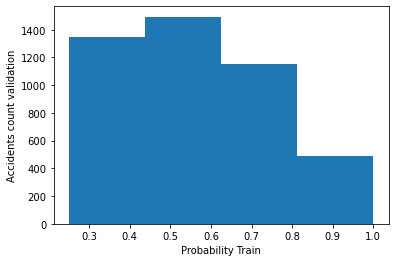

In [78]:
plot_hist(Probability_test, 4 , "Accidents count validation", "Probability Train")

In [79]:
linear_regression = LinearRegression()

In [80]:
linear_regression.fit(accidents_attributes_train, Probability_train)

LinearRegression()

In [81]:
def display_scores(estimator, train_attributes, train_labels, test_attributes, test_labels):
    print(f"Train score: {estimator.score(train_attributes, train_labels)}")
    print(f"Test score: {estimator.score(test_attributes, test_labels)}")

In [82]:
display_scores(linear_regression, 
               accidents_attributes_train, Probability_train, 
               accidents_attributes, Probability)

Train score: 0.1454213028639354
Test score: 0.14849905748283532


In [83]:
li_predict=linear_regression.predict(accidents_attributes_test)

li_predict


array([0.57337   , 0.62280825, 0.58686298, 0.57308673, 0.60201583,
       0.62112815, 0.57351827, 0.36628757, 0.66827284, 0.56408772,
       0.54540786, 0.60076509, 0.58659682, 0.58830943, 0.64230835,
       0.5891254 , 0.53421978, 0.32426561, 0.60090847, 0.57100717,
       0.55911082, 0.52384593, 0.62187152, 0.59494734, 0.5776034 ,
       0.54824406, 0.57412104, 0.57627133, 0.61861148, 0.60367365,
       0.62527263, 0.6213925 , 0.55096634, 0.64321918, 0.64375014,
       0.63646688, 0.55428624, 0.62031681, 0.59523171, 0.61480338,
       0.53189885, 0.52178591, 0.56794702, 0.12465882, 0.47093372,
       0.57073262, 0.45927724, 0.56291724, 0.5762316 , 0.59428504,
       0.56675002, 0.55060377, 0.63766056, 0.43030061, 0.47016464,
       0.554053  , 0.50205752, 0.57775143, 0.38388395, 0.58981972,
       0.56248004, 0.63492609, 0.6148809 , 0.60633555, 0.30884604,
       0.58001588, 0.54429149, 0.58704648, 0.55094331, 0.559743  ,
       0.46784318, 0.56853994, 0.60145806, 0.38667272, 0.55092

In [90]:
def predict(Distance,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour):
    df=pd.read_csv('NEW BUILD transformed-2-0-csv.csv')
    df=df.drop(['Probability'],axis=1)
    num_arr=pd.DataFrame(np.array([[Distance,Temperature,Wind_Chill,Humidity,Pressure,Visibility,Wind_Speed,Precipitation,Bump,Crossing,Roundabout,Stop,Traffic_Signal,Accident_year,Accident_month,Accident_hour]]),columns=df.columns)
    df_concatnd=pd.concat([df,num_arr],axis=0)
    df_concatnd.reset_index(drop=True,inplace=True)
    df_concatnd_last=df_concatnd.iloc[-1,:]
    prediction=linear_regression.predict(np.array([df_concatnd_last]))
    final_probabilty=np.round(prediction,5)*100
    return final_probabilty
    

In [91]:
predict(0.224,95,95,46,29.89,10,14,0,False,False,False,False,False,2021,8,16)

array([42.995])

In [92]:
import pickle

In [94]:
with open('fitted_model_2-0-LR.pickle','wb') as modelFile:
     pickle.dump(linear_regression,modelFile)